In [ ]:
#| hide
import kglab
import pandas as pd
from sbom_analysis.core import *

pd.set_option("display.precision", 2)

# SBOM Generation Tools Analysis from Pytorch repo

This page analyzes the performance of some SBOMs tool generation from the [PyTorch](https://github.com/pytorch/pytorch) GitHub Repository.

In [ ]:
dir_qs = "../../../data/tools_cs1/sbomqs/"
sbomqs_df, feature_qscores = sbomqs_scores(dir_qs)

In [ ]:
sbomqs_df

,gen_tool_name,avg_score,num_components,gen_tool_version,spec_version,file_name
1,cdxgen,7.42,24,8.5.3,SPDX-2.2,pytorch-cdxgen-spdx22.json
3,tern,7.38,181,2.12.0,SPDX-2.2,di-pytorch-tern-spdx22.json
5,FOSSA v0.12.0,7.30,212,,SPDX-2.3,pytorch-fossa-spdx23.json
8,bom,7.27,1,v0.5.1,SPDX-2.3,pytorch-bom-spdx23.json
7,GitHub.com-Dependency-Graph,6.83,231,,SPDX-2.3,pytorch-gh-sbom-spdx23.json
0,syft,6.82,201,0.83.1,SPDX-2.3,pytorch-syft-spdx23.json
6,trivy,6.77,124,0.42.1,SPDX-2.3,pytorch-trivy-spdx23.json
2,Microsoft.SBOMTool,6.36,229,1.1.6,SPDX-2.2,manifest.spdx.json
4,sbom4python,3.86,0,0.9.1,SPDX-2.3,pytorch-sbom4python-spdx23.json


In [ ]:
feature_qscores

,category,feature,score,max_score,description,ignored,tool
0,Structural,sbom_spec,10.0,10,provided sbom is in a supported sbom format of...,False,cdxgen
1,Structural,sbom_spec_version,10.0,10,provided sbom should be in supported spec vers...,False,cdxgen
2,Structural,sbom_spec_file_format,10.0,10,provided sbom should be in supported file form...,False,cdxgen
3,Structural,sbom_parsable,10.0,10,provided sbom is parsable,False,cdxgen
4,NTIA-minimum-elements,comp_with_supplier,0.0,10,0/24 have supplier names,False,cdxgen
...,...,...,...,...,...,...,...
17,Quality,comp_with_restrictive_licenses,0.0,10,N/A (no components),True,sbom4python
18,Quality,comp_with_any_vuln_lookup_id,0.0,10,N/A (no components),True,sbom4python
19,Quality,comp_with_multi_vuln_lookup_id,0.0,10,N/A (no components),True,sbom4python
20,Quality,sbom_with_creator_and_version,10.0,10,1/1 tools have creator and version,False,sbom4python


In [ ]:
sbomqs_score_by_cat(feature_qscores)

tool,category,tern,FOSSA v0.12.0,Microsoft.SBOMTool,syft,trivy,cdxgen,bom,GitHub.com-Dependency-Graph,sbom4python
0,NTIA-minimum-elements,9.42,9.18,8.58,8.57,8.50,7.14,7.14,6.99,2.86
1,Quality,4.50,4.17,2.85,4.29,4.22,5.24,5.71,5.00,1.43
2,Semantic,4.99,5.71,3.33,3.35,3.33,8.89,6.67,5.44,1.67
3,Sharing,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
4,Structural,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00


In [ ]:
#sbomqs_radar_chart(feature_qscores)

![Caption](../../figs/sbomqs_radar_chart.png)

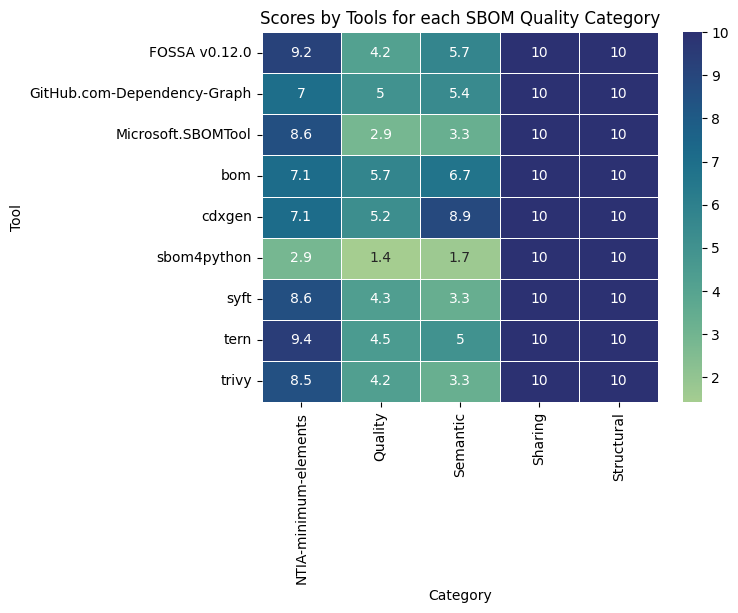

In [ ]:
display_qscores_heatmap(feature_qscores)

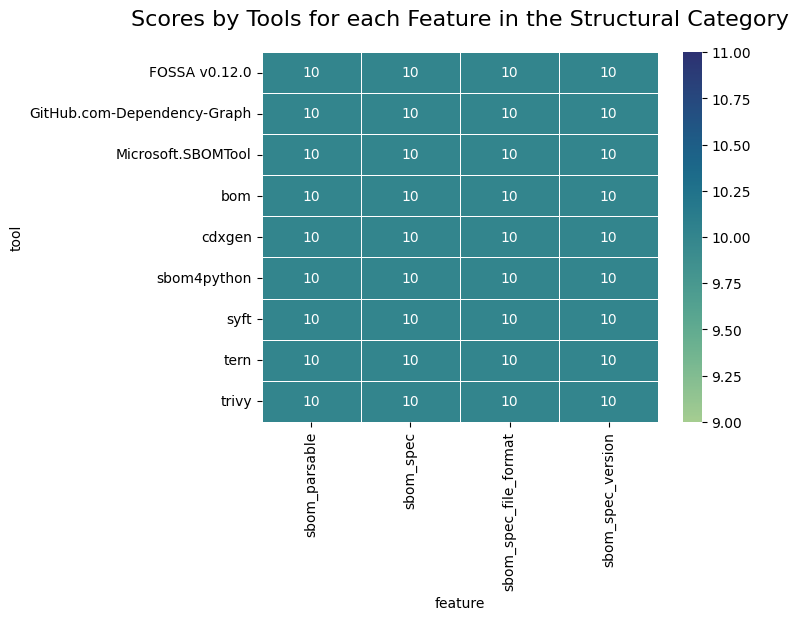

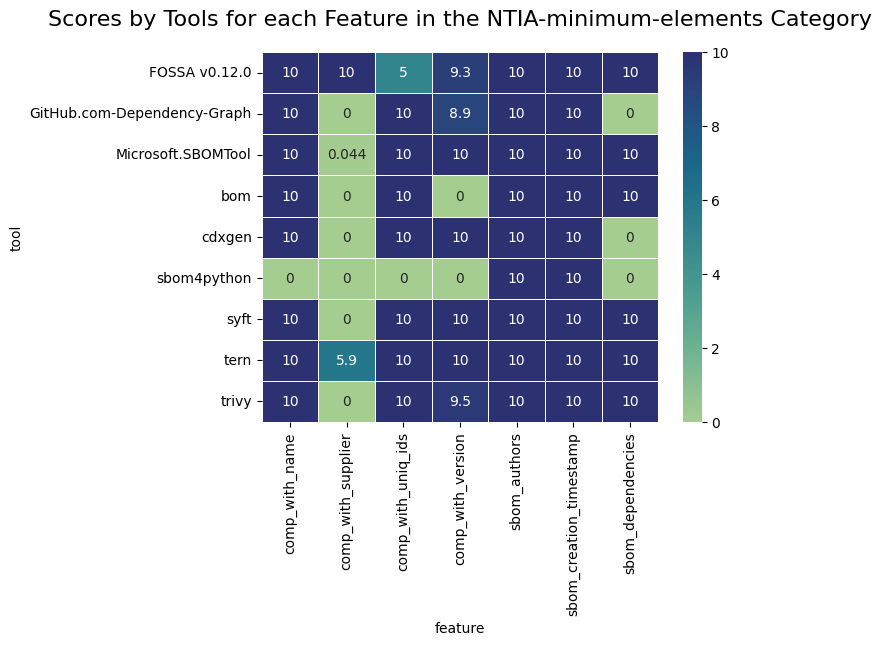

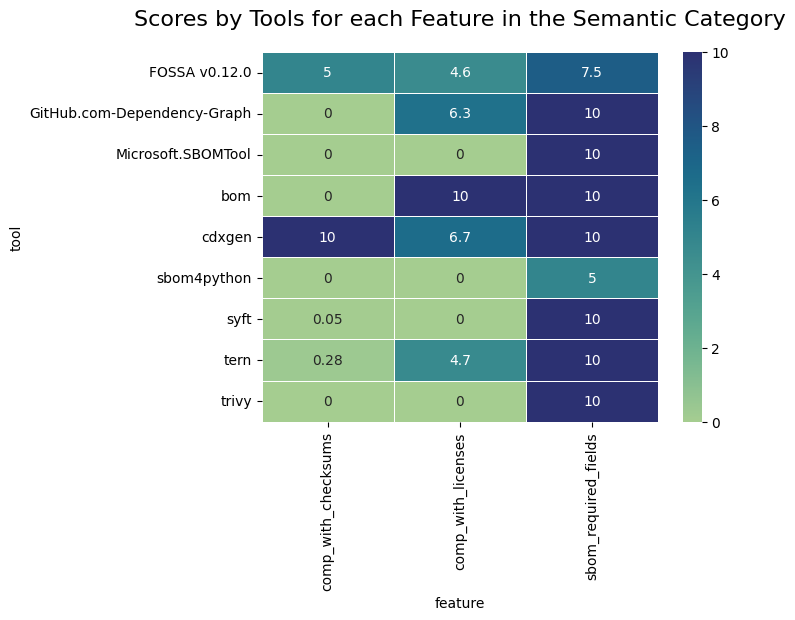

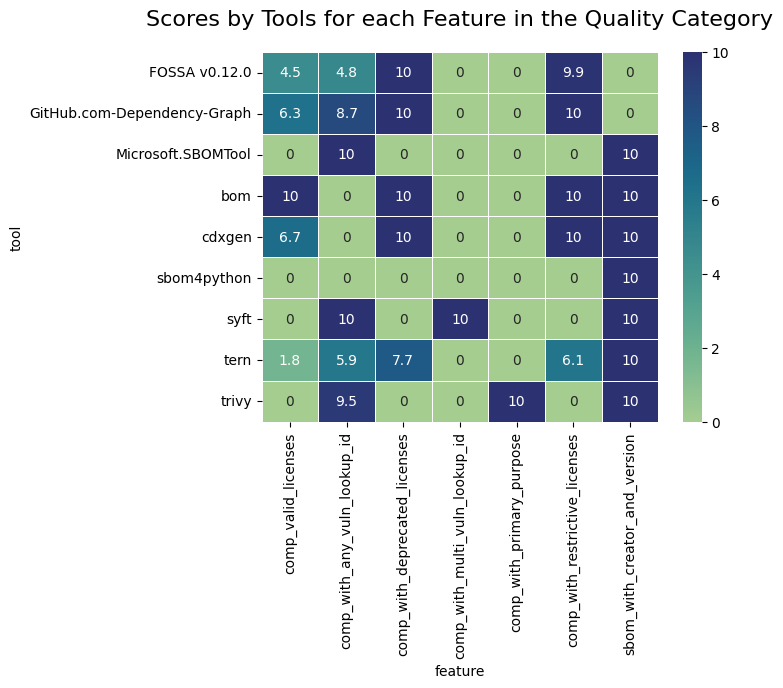

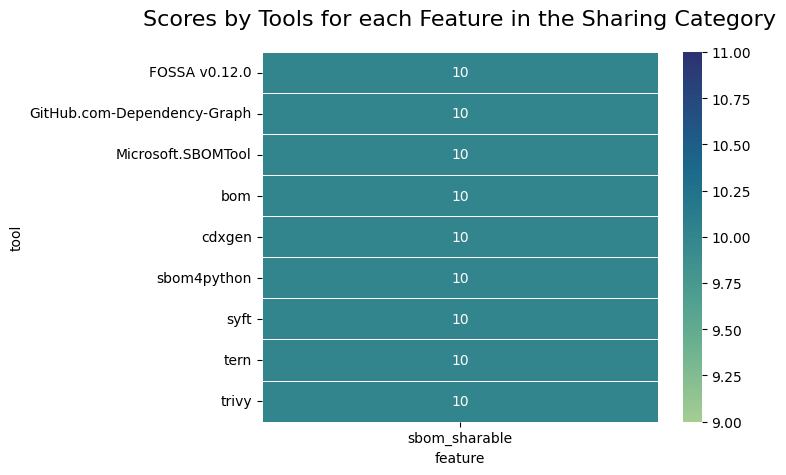

In [ ]:
display_category_qscores_heatmap(feature_qscores) #, ['NTIA-minimum-elements'])

In [ ]:
display_qscores_with_descriptions(feature_qscores)

,feature,score,description,tool
0,sbom_spec,10.0,provided sbom is in a supported sbom format of...,FOSSA v0.12.0
1,sbom_spec_version,10.0,provided sbom should be in supported spec vers...,FOSSA v0.12.0
2,sbom_spec_file_format,10.0,provided sbom should be in supported file form...,FOSSA v0.12.0
3,sbom_parsable,10.0,provided sbom is parsable,FOSSA v0.12.0


,feature,score,description,tool
4,comp_with_supplier,10.00,212/212 have supplier names,FOSSA v0.12.0
5,comp_with_name,10.00,212/212 have names,FOSSA v0.12.0
6,comp_with_version,9.29,197/212 have versions,FOSSA v0.12.0
7,comp_with_uniq_ids,5.00,106/212 have unique ID's,FOSSA v0.12.0
8,sbom_dependencies,10.00,doc has 211 relationships,FOSSA v0.12.0
9,sbom_authors,10.00,doc has 2 authors,FOSSA v0.12.0
10,sbom_creation_timestamp,10.00,doc has creation timestamp,FOSSA v0.12.0


,feature,score,description,tool
11,sbom_required_fields,7.50,Doc Fields:true Pkg Fields:false,FOSSA v0.12.0
12,comp_with_licenses,4.62,98/212 have licenses,FOSSA v0.12.0
13,comp_with_checksums,5.00,106/212 have checksums,FOSSA v0.12.0


,feature,score,description,tool
14,comp_valid_licenses,4.54,97/212 components with valid license,FOSSA v0.12.0
15,comp_with_primary_purpose,0.00,0/212 components have primary purpose specified,FOSSA v0.12.0
16,comp_with_deprecated_licenses,10.00,0/212 components have deprecated licenses,FOSSA v0.12.0
17,comp_with_restrictive_licenses,9.86,3/212 components have restricted licenses,FOSSA v0.12.0
18,comp_with_any_vuln_lookup_id,4.81,102/212 components have any lookup id,FOSSA v0.12.0
19,comp_with_multi_vuln_lookup_id,0.00,0/212 components have multiple lookup id,FOSSA v0.12.0
20,sbom_with_creator_and_version,0.00,0/1 tools have creator and version,FOSSA v0.12.0


,feature,score,description,tool
21,sbom_sharable,10.0,doc has a sharable license free 1 :: of 1,FOSSA v0.12.0


,feature,score,description,tool
0,sbom_spec,10.0,provided sbom is in a supported sbom format of...,GitHub.com-Dependency-Graph
1,sbom_spec_version,10.0,provided sbom should be in supported spec vers...,GitHub.com-Dependency-Graph
2,sbom_spec_file_format,10.0,provided sbom should be in supported file form...,GitHub.com-Dependency-Graph
3,sbom_parsable,10.0,provided sbom is parsable,GitHub.com-Dependency-Graph


,feature,score,description,tool
4,comp_with_supplier,0.00,0/231 have supplier names,GitHub.com-Dependency-Graph
5,comp_with_name,10.00,231/231 have names,GitHub.com-Dependency-Graph
6,comp_with_version,8.92,206/231 have versions,GitHub.com-Dependency-Graph
7,comp_with_uniq_ids,10.00,231/231 have unique ID's,GitHub.com-Dependency-Graph
8,sbom_dependencies,0.00,doc has 0 relationships,GitHub.com-Dependency-Graph
9,sbom_authors,10.00,doc has 1 authors,GitHub.com-Dependency-Graph
10,sbom_creation_timestamp,10.00,doc has creation timestamp,GitHub.com-Dependency-Graph


,feature,score,description,tool
11,sbom_required_fields,10.00,Doc Fields:true Pkg Fields:true,GitHub.com-Dependency-Graph
12,comp_with_licenses,6.32,146/231 have licenses,GitHub.com-Dependency-Graph
13,comp_with_checksums,0.00,0/231 have checksums,GitHub.com-Dependency-Graph


,feature,score,description,tool
14,comp_valid_licenses,6.32,146/231 components with valid license,GitHub.com-Dependency-Graph
15,comp_with_primary_purpose,0.00,0/231 components have primary purpose specified,GitHub.com-Dependency-Graph
16,comp_with_deprecated_licenses,10.00,0/231 components have deprecated licenses,GitHub.com-Dependency-Graph
17,comp_with_restrictive_licenses,10.00,0/231 components have restricted licenses,GitHub.com-Dependency-Graph
18,comp_with_any_vuln_lookup_id,8.70,201/231 components have any lookup id,GitHub.com-Dependency-Graph
19,comp_with_multi_vuln_lookup_id,0.00,0/231 components have multiple lookup id,GitHub.com-Dependency-Graph
20,sbom_with_creator_and_version,0.00,0/1 tools have creator and version,GitHub.com-Dependency-Graph


,feature,score,description,tool
21,sbom_sharable,10.0,doc has a sharable license free 1 :: of 1,GitHub.com-Dependency-Graph


,feature,score,description,tool
0,sbom_spec,10.0,provided sbom is in a supported sbom format of...,Microsoft.SBOMTool
1,sbom_spec_version,10.0,provided sbom should be in supported spec vers...,Microsoft.SBOMTool
2,sbom_spec_file_format,10.0,provided sbom should be in supported file form...,Microsoft.SBOMTool
3,sbom_parsable,10.0,provided sbom is parsable,Microsoft.SBOMTool


,feature,score,description,tool
4,comp_with_supplier,0.04,1/229 have supplier names,Microsoft.SBOMTool
5,comp_with_name,10.00,229/229 have names,Microsoft.SBOMTool
6,comp_with_version,10.00,229/229 have versions,Microsoft.SBOMTool
7,comp_with_uniq_ids,10.00,229/229 have unique ID's,Microsoft.SBOMTool
8,sbom_dependencies,10.00,doc has 229 relationships,Microsoft.SBOMTool
9,sbom_authors,10.00,doc has 2 authors,Microsoft.SBOMTool
10,sbom_creation_timestamp,10.00,doc has creation timestamp,Microsoft.SBOMTool


,feature,score,description,tool
11,sbom_required_fields,10.0,Doc Fields:true Pkg Fields:true,Microsoft.SBOMTool
12,comp_with_licenses,0.0,0/229 have licenses,Microsoft.SBOMTool
13,comp_with_checksums,0.0,0/229 have checksums,Microsoft.SBOMTool


,feature,score,description,tool
14,comp_valid_licenses,0.00,0/229 components with valid license,Microsoft.SBOMTool
15,comp_with_primary_purpose,0.00,0/229 components have primary purpose specified,Microsoft.SBOMTool
16,comp_with_deprecated_licenses,0.00,no licenses found,Microsoft.SBOMTool
17,comp_with_restrictive_licenses,0.00,no licenses found,Microsoft.SBOMTool
18,comp_with_any_vuln_lookup_id,9.96,228/229 components have any lookup id,Microsoft.SBOMTool
19,comp_with_multi_vuln_lookup_id,0.00,0/229 components have multiple lookup id,Microsoft.SBOMTool
20,sbom_with_creator_and_version,10.00,1/1 tools have creator and version,Microsoft.SBOMTool


,feature,score,description,tool
21,sbom_sharable,10.0,doc has a sharable license free 1 :: of 1,Microsoft.SBOMTool


,feature,score,description,tool
0,sbom_spec,10.0,provided sbom is in a supported sbom format of...,bom
1,sbom_spec_version,10.0,provided sbom should be in supported spec vers...,bom
2,sbom_spec_file_format,10.0,provided sbom should be in supported file form...,bom
3,sbom_parsable,10.0,provided sbom is parsable,bom


,feature,score,description,tool
4,comp_with_supplier,0.0,0/1 have supplier names,bom
5,comp_with_name,10.0,1/1 have names,bom
6,comp_with_version,0.0,0/1 have versions,bom
7,comp_with_uniq_ids,10.0,1/1 have unique ID's,bom
8,sbom_dependencies,10.0,doc has 12068 relationships,bom
9,sbom_authors,10.0,doc has 1 authors,bom
10,sbom_creation_timestamp,10.0,doc has creation timestamp,bom


,feature,score,description,tool
11,sbom_required_fields,10.0,Doc Fields:true Pkg Fields:true,bom
12,comp_with_licenses,10.0,1/1 have licenses,bom
13,comp_with_checksums,0.0,0/1 have checksums,bom


,feature,score,description,tool
14,comp_valid_licenses,10.0,1/1 components with valid license,bom
15,comp_with_primary_purpose,0.0,0/1 components have primary purpose specified,bom
16,comp_with_deprecated_licenses,10.0,0/1 components have deprecated licenses,bom
17,comp_with_restrictive_licenses,10.0,0/1 components have restricted licenses,bom
18,comp_with_any_vuln_lookup_id,0.0,0/1 components have any lookup id,bom
19,comp_with_multi_vuln_lookup_id,0.0,0/1 components have multiple lookup id,bom
20,sbom_with_creator_and_version,10.0,1/1 tools have creator and version,bom


,feature,score,description,tool
21,sbom_sharable,10.0,doc has a sharable license free 1 :: of 1,bom


,feature,score,description,tool
0,sbom_spec,10.0,provided sbom is in a supported sbom format of...,cdxgen
1,sbom_spec_version,10.0,provided sbom should be in supported spec vers...,cdxgen
2,sbom_spec_file_format,10.0,provided sbom should be in supported file form...,cdxgen
3,sbom_parsable,10.0,provided sbom is parsable,cdxgen


,feature,score,description,tool
4,comp_with_supplier,0.0,0/24 have supplier names,cdxgen
5,comp_with_name,10.0,24/24 have names,cdxgen
6,comp_with_version,10.0,24/24 have versions,cdxgen
7,comp_with_uniq_ids,10.0,24/24 have unique ID's,cdxgen
8,sbom_dependencies,0.0,doc has 0 relationships,cdxgen
9,sbom_authors,10.0,doc has 2 authors,cdxgen
10,sbom_creation_timestamp,10.0,doc has creation timestamp,cdxgen


,feature,score,description,tool
11,sbom_required_fields,10.00,Doc Fields:true Pkg Fields:true,cdxgen
12,comp_with_licenses,6.67,16/24 have licenses,cdxgen
13,comp_with_checksums,10.00,24/24 have checksums,cdxgen


,feature,score,description,tool
14,comp_valid_licenses,6.67,16/24 components with valid license,cdxgen
15,comp_with_primary_purpose,0.00,0/24 components have primary purpose specified,cdxgen
16,comp_with_deprecated_licenses,10.00,0/24 components have deprecated licenses,cdxgen
17,comp_with_restrictive_licenses,10.00,0/24 components have restricted licenses,cdxgen
18,comp_with_any_vuln_lookup_id,0.00,0/24 components have any lookup id,cdxgen
19,comp_with_multi_vuln_lookup_id,0.00,0/24 components have multiple lookup id,cdxgen
20,sbom_with_creator_and_version,10.00,1/1 tools have creator and version,cdxgen


,feature,score,description,tool
21,sbom_sharable,10.0,doc has a sharable license free 1 :: of 1,cdxgen


,feature,score,description,tool
0,sbom_spec,10.0,provided sbom is in a supported sbom format of...,sbom4python
1,sbom_spec_version,10.0,provided sbom should be in supported spec vers...,sbom4python
2,sbom_spec_file_format,10.0,provided sbom should be in supported file form...,sbom4python
3,sbom_parsable,10.0,provided sbom is parsable,sbom4python


,feature,score,description,tool
4,comp_with_supplier,0.0,N/A (no components),sbom4python
5,comp_with_name,0.0,N/A (no components),sbom4python
6,comp_with_version,0.0,N/A (no components),sbom4python
7,comp_with_uniq_ids,0.0,N/A (no components),sbom4python
8,sbom_dependencies,0.0,doc has 0 relationships,sbom4python
9,sbom_authors,10.0,doc has 1 authors,sbom4python
10,sbom_creation_timestamp,10.0,doc has creation timestamp,sbom4python


,feature,score,description,tool
11,sbom_required_fields,5.0,Doc Fields:true Pkg Fields:false,sbom4python
12,comp_with_licenses,0.0,N/A (no components),sbom4python
13,comp_with_checksums,0.0,N/A (no components),sbom4python


,feature,score,description,tool
14,comp_valid_licenses,0.0,N/A (no components),sbom4python
15,comp_with_primary_purpose,0.0,N/A (no components),sbom4python
16,comp_with_deprecated_licenses,0.0,N/A (no components),sbom4python
17,comp_with_restrictive_licenses,0.0,N/A (no components),sbom4python
18,comp_with_any_vuln_lookup_id,0.0,N/A (no components),sbom4python
19,comp_with_multi_vuln_lookup_id,0.0,N/A (no components),sbom4python
20,sbom_with_creator_and_version,10.0,1/1 tools have creator and version,sbom4python


,feature,score,description,tool
21,sbom_sharable,10.0,doc has a sharable license free 1 :: of 1,sbom4python


,feature,score,description,tool
0,sbom_spec,10.0,provided sbom is in a supported sbom format of...,syft
1,sbom_spec_version,10.0,provided sbom should be in supported spec vers...,syft
2,sbom_spec_file_format,10.0,provided sbom should be in supported file form...,syft
3,sbom_parsable,10.0,provided sbom is parsable,syft


,feature,score,description,tool
4,comp_with_supplier,0.0,0/201 have supplier names,syft
5,comp_with_name,10.0,201/201 have names,syft
6,comp_with_version,10.0,201/201 have versions,syft
7,comp_with_uniq_ids,10.0,201/201 have unique ID's,syft
8,sbom_dependencies,10.0,doc has 1 relationships,syft
9,sbom_authors,10.0,doc has 2 authors,syft
10,sbom_creation_timestamp,10.0,doc has creation timestamp,syft


,feature,score,description,tool
11,sbom_required_fields,10.00,Doc Fields:true Pkg Fields:true,syft
12,comp_with_licenses,0.00,0/201 have licenses,syft
13,comp_with_checksums,0.05,1/201 have checksums,syft


,feature,score,description,tool
14,comp_valid_licenses,0.0,0/201 components with valid license,syft
15,comp_with_primary_purpose,0.0,0/201 components have primary purpose specified,syft
16,comp_with_deprecated_licenses,0.0,no licenses found,syft
17,comp_with_restrictive_licenses,0.0,no licenses found,syft
18,comp_with_any_vuln_lookup_id,10.0,201/201 components have any lookup id,syft
19,comp_with_multi_vuln_lookup_id,10.0,201/201 components have multiple lookup id,syft
20,sbom_with_creator_and_version,10.0,1/1 tools have creator and version,syft


,feature,score,description,tool
21,sbom_sharable,10.0,doc has a sharable license free 1 :: of 1,syft


,feature,score,description,tool
0,sbom_spec,10.0,provided sbom is in a supported sbom format of...,tern
1,sbom_spec_version,10.0,provided sbom should be in supported spec vers...,tern
2,sbom_spec_file_format,10.0,provided sbom should be in supported file form...,tern
3,sbom_parsable,10.0,provided sbom is parsable,tern


,feature,score,description,tool
4,comp_with_supplier,5.91,107/181 have supplier names,tern
5,comp_with_name,10.00,181/181 have names,tern
6,comp_with_version,10.00,181/181 have versions,tern
7,comp_with_uniq_ids,10.00,181/181 have unique ID's,tern
8,sbom_dependencies,10.00,doc has 117 relationships,tern
9,sbom_authors,10.00,doc has 1 authors,tern
10,sbom_creation_timestamp,10.00,doc has creation timestamp,tern


,feature,score,description,tool
11,sbom_required_fields,10.00,Doc Fields:true Pkg Fields:true,tern
12,comp_with_licenses,4.70,85/181 have licenses,tern
13,comp_with_checksums,0.28,5/181 have checksums,tern


,feature,score,description,tool
14,comp_valid_licenses,1.78,65/181 components with valid license,tern
15,comp_with_primary_purpose,0.00,0/181 components have primary purpose specified,tern
16,comp_with_deprecated_licenses,7.73,41/181 components have deprecated licenses,tern
17,comp_with_restrictive_licenses,6.08,71/181 components have restricted licenses,tern
18,comp_with_any_vuln_lookup_id,5.91,107/181 components have any lookup id,tern
19,comp_with_multi_vuln_lookup_id,0.00,0/181 components have multiple lookup id,tern
20,sbom_with_creator_and_version,10.00,1/1 tools have creator and version,tern


,feature,score,description,tool
21,sbom_sharable,10.0,doc has a sharable license free 1 :: of 1,tern


,feature,score,description,tool
0,sbom_spec,10.0,provided sbom is in a supported sbom format of...,trivy
1,sbom_spec_version,10.0,provided sbom should be in supported spec vers...,trivy
2,sbom_spec_file_format,10.0,provided sbom should be in supported file form...,trivy
3,sbom_parsable,10.0,provided sbom is parsable,trivy


,feature,score,description,tool
4,comp_with_supplier,0.00,0/124 have supplier names,trivy
5,comp_with_name,10.00,124/124 have names,trivy
6,comp_with_version,9.52,118/124 have versions,trivy
7,comp_with_uniq_ids,10.00,124/124 have unique ID's,trivy
8,sbom_dependencies,10.00,doc has 126 relationships,trivy
9,sbom_authors,10.00,doc has 2 authors,trivy
10,sbom_creation_timestamp,10.00,doc has creation timestamp,trivy


,feature,score,description,tool
11,sbom_required_fields,10.0,Doc Fields:true Pkg Fields:true,trivy
12,comp_with_licenses,0.0,0/124 have licenses,trivy
13,comp_with_checksums,0.0,0/124 have checksums,trivy


,feature,score,description,tool
14,comp_valid_licenses,0.00,0/124 components with valid license,trivy
15,comp_with_primary_purpose,10.00,124/124 components have primary purpose specified,trivy
16,comp_with_deprecated_licenses,0.00,no licenses found,trivy
17,comp_with_restrictive_licenses,0.00,no licenses found,trivy
18,comp_with_any_vuln_lookup_id,9.52,118/124 components have any lookup id,trivy
19,comp_with_multi_vuln_lookup_id,0.00,0/124 components have multiple lookup id,trivy
20,sbom_with_creator_and_version,10.00,1/1 tools have creator and version,trivy


,feature,score,description,tool
21,sbom_sharable,10.0,doc has a sharable license free 1 :: of 1,trivy
